### sma(이동 평균)

- 연속된 데이터의 평균을 구함, 시계열 데이터에서 노이즈를 줄이고 전반적인 추세 파악
- 적절한 윈도우(기간)을 설정하여 데이터를 순차적으로 평균내어 계산

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                           roc_curve, auc, precision_recall_curve, confusion_matrix,
                           classification_report, average_precision_score)
from sklearn.preprocessing import LabelEncoder
from sklearn.calibration import calibration_curve
from itertools import cycle

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
data = pd.read_csv('/content/drive/MyDrive/jong_su/merged_V2.csv')
df = data

In [4]:
# sma 적용
coordinate_columns = [col for col in df.columns if '_x' in col or '_y' in col]

#sma 계산
def apply_sma(df, window_size):
    return df.rolling(window=window_size, min_periods=1).mean()

window_size = 10

for col in coordinate_columns:
    df[f"{col}_SMA"] = apply_sma(df[col], window_size)

df.head()

,image_filename,Nose_x,Nose_y,LEye_x,LEye_y,REye_x,REye_y,LEar_x,LEar_y,REar_x,...,RBigToe_x_SMA,RBigToe_y_SMA,LSmallToe_x_SMA,LSmallToe_y_SMA,RSmallToe_x_SMA,RSmallToe_y_SMA,LHeel_x_SMA,LHeel_y_SMA,RHeel_x_SMA,RHeel_y_SMA
0,0.jpg,1368.317139,245.318161,1375.947510,242.774719,1368.317139,240.231262,1388.664673,245.318161,1386.121338,...,1355.599976,466.598053,1360.686768,466.598053,1355.599976,464.054596,1383.577881,456.424255,1386.121338,456.424255
1,1.jpg,1367.379517,245.956863,1375.112671,240.801453,1367.379517,240.801453,1388.001221,245.956863,1385.423462,...,1355.045471,465.829834,1360.166626,467.118683,1355.045471,463.269241,1384.500671,456.876373,1385.772400,456.876373
2,2.jpg,1365.833862,248.601212,1373.505005,243.487152,1365.833862,243.487152,1386.290161,246.044174,1383.733032,...,1355.232259,465.869395,1359.498698,466.728628,1355.232259,463.309987,1383.392456,457.343394,1386.797323,456.491048
3,3.jpg,1365.026855,247.695007,1372.763184,242.537491,1365.026855,242.537491,1385.656982,247.695007,1380.499390,...,1355.102173,466.124359,1359.591370,466.768784,1355.102173,463.560120,1382.669189,457.795792,1387.156921,456.511848
4,4.jpg,1362.091553,247.426620,1369.815674,242.277222,1364.666260,239.702530,1382.689209,247.426620,1380.114502,...,1354.955225,466.154700,1359.576465,466.670239,1354.955225,463.588373,1383.703076,457.947028,1387.293262,456.404932


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


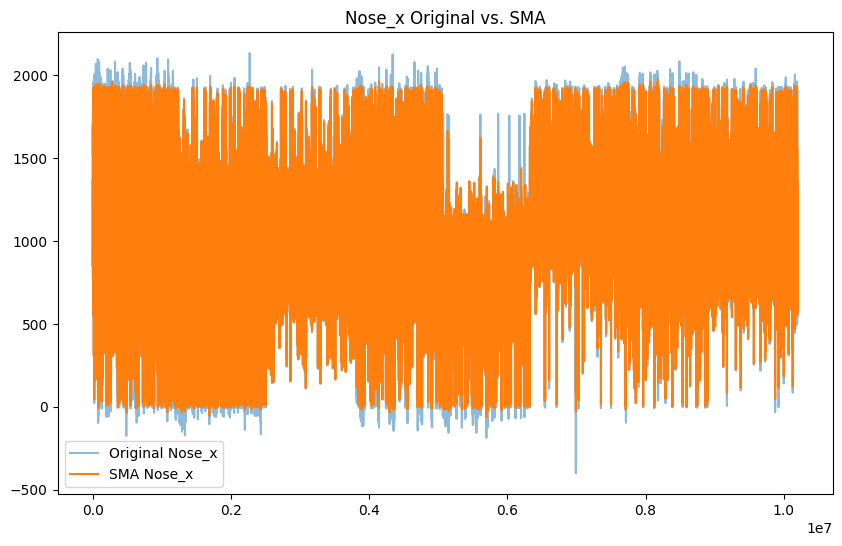

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(data['Nose_x'], label='Original Nose_x', alpha=0.5)
plt.plot(data['Nose_x_SMA'], label='SMA Nose_x')
plt.legend()
plt.title("Nose_x Original vs. SMA")
plt.show()

In [6]:
df = df.drop(['image_filename', 'Nose_x', 'Nose_y', 'LEye_x', 'LEye_y', 'REye_x', 'REye_y', 'LEar_x', 'LEar_y', 'REar_x', 'REar_y', 'LShoulder_x', 'LShoulder_y', 'RShoulder_x', 'RShoulder_y', 'LElbow_x', 'LElbow_y', 'RElbow_x', 'RElbow_y', 'LWrist_x', 'LWrist_y', 'RWrist_x', 'RWrist_y', 'LHip_x', 'LHip_y', 'RHip_x', 'RHip_y', 'LKnee_x', 'LKnee_y', 'RKnee_x', 'RKnee_y', 'LAnkle_x', 'LAnkle_y', 'RAnkle_x', 'RAnkle_y', 'Head_x', 'Head_y', 'Neck_x', 'Neck_y', 'Hip_x', 'Hip_y', 'LBigToe_x', 'LBigToe_y', 'RBigToe_x', 'RBigToe_y', 'LSmallToe_x', 'LSmallToe_y', 'RSmallToe_x', 'RSmallToe_y', 'LHeel_x', 'LHeel_y', 'RHeel_x', 'RHeel_y', 'gender', 'level','path'], axis=1)

In [7]:
encoder = LabelEncoder()
encoder.fit(data['label'])

df["label"] = encoder.transform(data['label'])
# 0 = jump, 1 = spin, 2 = step

In [8]:
X = df.drop(['label'] , axis=1)
Y = df['label']

print(X.shape)
print(Y.shape)

(10196123, 52)
(10196123,)


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

X_train, X_val, Y_train, Y_val = train_test_split(
    X_train, Y_train, test_size=0.2, random_state=42, stratify=Y_train
)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(X_val.shape)
print(Y_val.shape)

(6525518, 52)
(2039225, 52)
(6525518,)
(2039225,)
(1631380, 52)
(1631380,)


In [10]:
# 모델 정의
models = {
    'Extra Trees': ExtraTreesClassifier(n_estimators=50, random_state=42, n_jobs=-1),
    'CatBoost': CatBoostClassifier(iterations=50, random_state=42, verbose=0),
    'LightGBM': LGBMClassifier(n_estimators=50, random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(n_estimators=50, random_state=42, n_jobs=-1),
    #'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1),
}

In [11]:
kf = KFold(n_splits=5, shuffle=False)
cv_scores = []

In [12]:
test_predictions = {name: np.zeros((X_test.shape[0], len(np.unique(Y_test)))) for name in models.keys()}

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"\n=== Fold {fold+1} ===")

    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    Y_train_fold, Y_val_fold = Y_train.iloc[train_idx], Y_train.iloc[val_idx]

    for name, model in models.items():
        print(f"Training {name}...")

        model.fit(X_train_fold, Y_train_fold)

         # 훈련 세트 성능 평가
        Y_train_pred = model.predict(X_train_fold)
        print("\n--- Training Set Performance ---")
        print(classification_report(Y_train_fold, Y_train_pred))

        # 검증 세트 성능 평가
        Y_val_pred = model.predict(X_val_fold)
        print("\n--- Validation Set Performance ---")
        print(classification_report(Y_val_fold, Y_val_pred))

        # Test Set 예측값 저장 (Soft Voting을 위해 확률 예측값 사용)
        test_predictions[name] += model.predict_proba(X_test) / kf.n_splits  # 평균 계산

# 최종 테스트 세트 평가 (앙상블 방식)
for name, pred_proba in test_predictions.items():
    print(f"\n=== Final Test Evaluation ({name}) - Averaged Over Folds ===")

    # 확률 예측값을 가장 높은 클래스 선택으로 변환
    Y_test_pred = np.argmax(pred_proba, axis=1)

    print("\n--- Test Set Performance ---")
    print(classification_report(Y_test, Y_test_pred))


=== Fold 1 ===
Training Extra Trees...

--- Training Set Performance ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2357516
           1       1.00      1.00      1.00   1681554
           2       1.00      1.00      1.00   1181344

    accuracy                           1.00   5220414
   macro avg       1.00      1.00      1.00   5220414
weighted avg       1.00      1.00      1.00   5220414


--- Validation Set Performance ---
              precision    recall  f1-score   support

           0       0.91      0.94      0.93    590021
           1       0.92      0.91      0.92    420720
           2       0.93      0.88      0.91    294363

    accuracy                           0.92   1305104
   macro avg       0.92      0.91      0.92   1305104
weighted avg       0.92      0.92      0.92   1305104

Training CatBoost...

--- Training Set Performance ---
              precision    recall  f1-score   support

           0      


=== Confusion Matrix (Extra Trees) ===


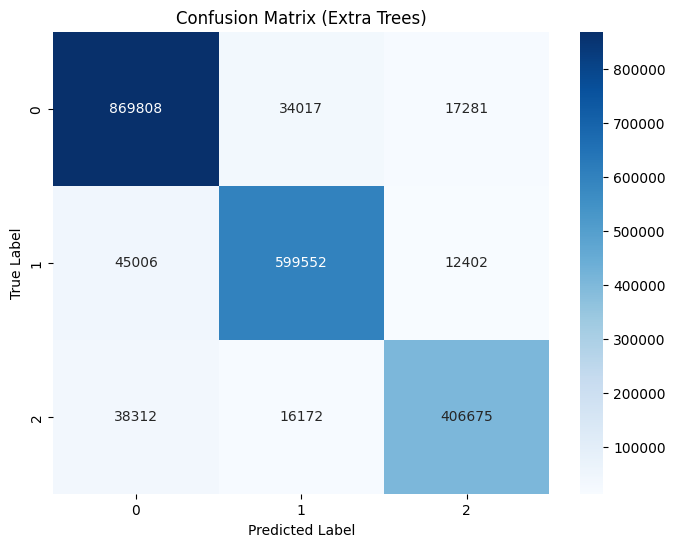


=== Confusion Matrix (CatBoost) ===


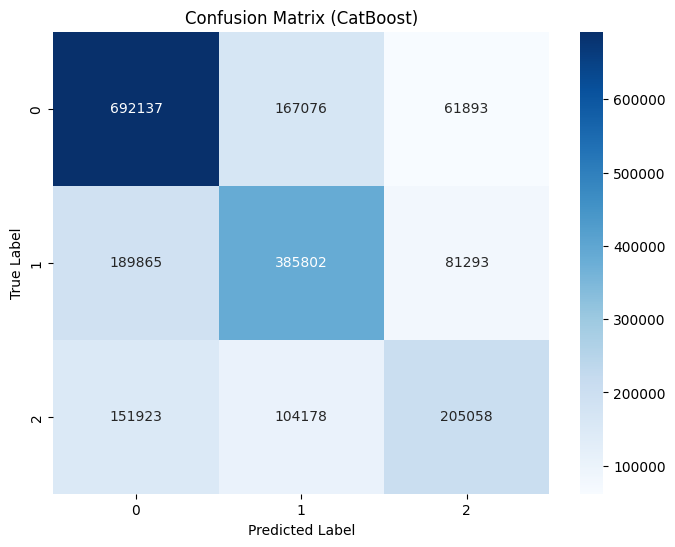


=== Confusion Matrix (LightGBM) ===


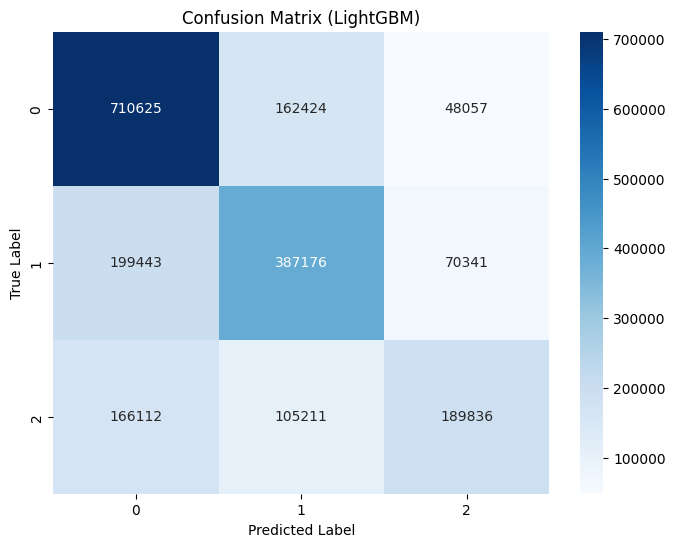


=== Confusion Matrix (XGBoost) ===


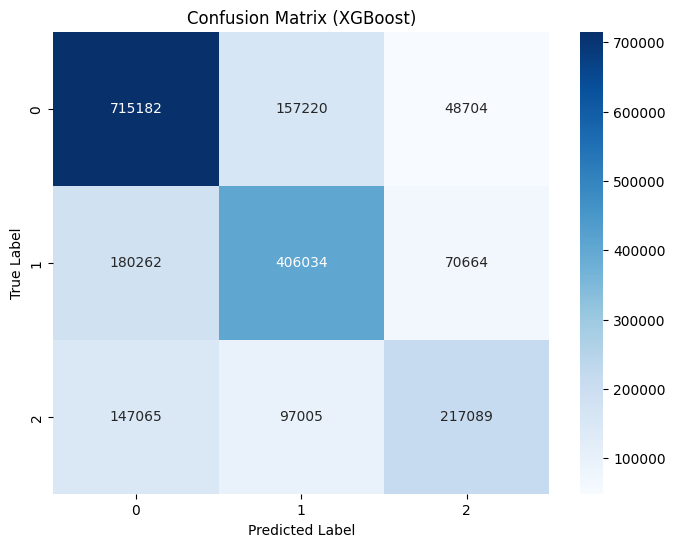

In [13]:
class_names = np.unique(Y_test)

for name, model in models.items():
    print(f"\n=== Confusion Matrix ({name}) ===")

    Y_test_pred = model.predict(X_test)

    cm = confusion_matrix(Y_test, Y_test_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

    plt.title(f'Confusion Matrix ({name})')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


=== Evaluating Extra Trees ===
Extra Trees Y_test_pred shape: (2039225,)
Extra Trees Y_test_pred (first 5): [0 1 1 1 0]


<ipython-input-14-7c017817cff4>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classwise_error.index, y=classwise_error.values, palette="viridis")


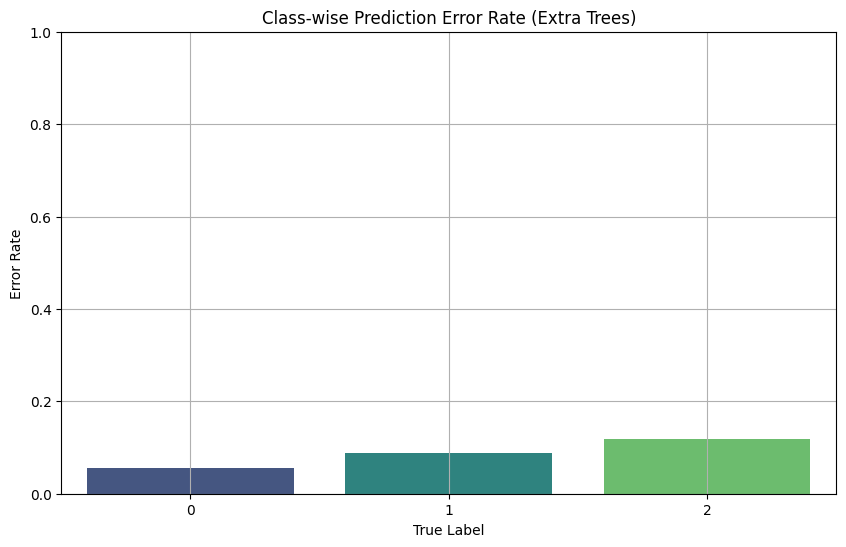

True Label
0    0.055692
1    0.087384
2    0.118146
Name: Error, dtype: float64

=== Evaluating CatBoost ===
CatBoost Y_test_pred shape: (2039225, 1)
CatBoost Y_test_pred (first 5): [0 1 1 1 0]


<ipython-input-14-7c017817cff4>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classwise_error.index, y=classwise_error.values, palette="viridis")


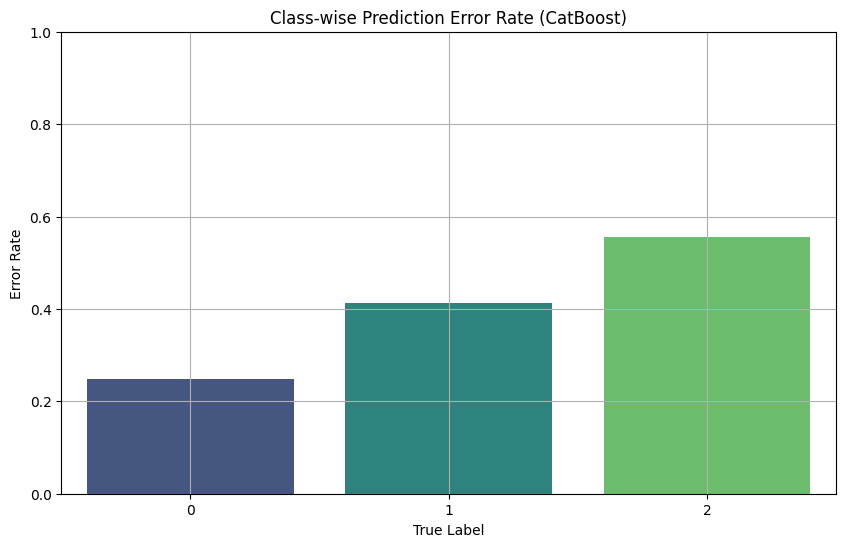

True Label
0    0.248581
1    0.412747
2    0.555342
Name: Error, dtype: float64

=== Evaluating LightGBM ===
LightGBM Y_test_pred shape: (2039225,)
LightGBM Y_test_pred (first 5): [0 1 1 1 0]


<ipython-input-14-7c017817cff4>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classwise_error.index, y=classwise_error.values, palette="viridis")


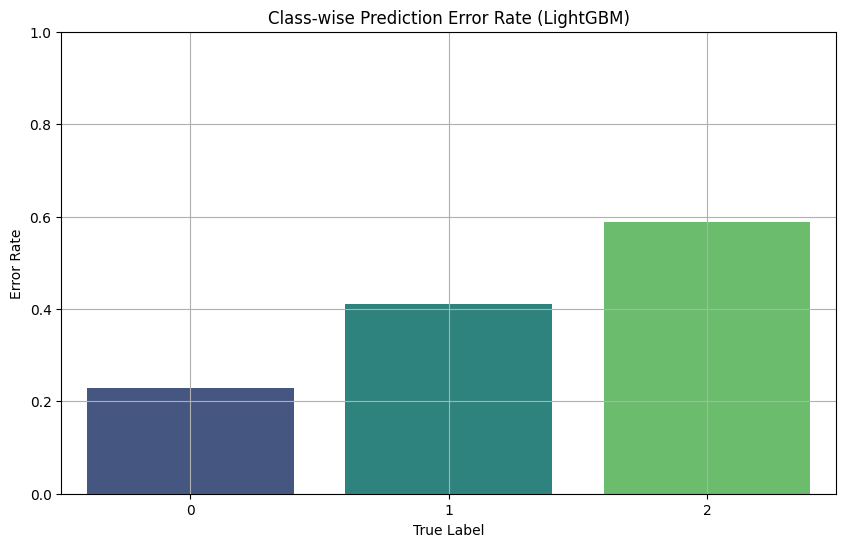

True Label
0    0.228509
1    0.410655
2    0.588350
Name: Error, dtype: float64

=== Evaluating XGBoost ===
XGBoost Y_test_pred shape: (2039225,)
XGBoost Y_test_pred (first 5): [0 1 1 1 0]


<ipython-input-14-7c017817cff4>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classwise_error.index, y=classwise_error.values, palette="viridis")


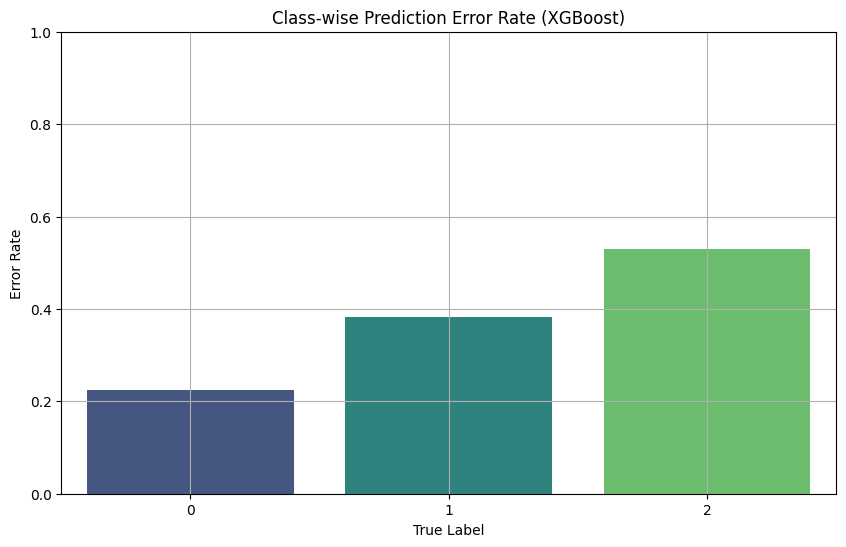

True Label
0    0.223562
1    0.381950
2    0.529253
Name: Error, dtype: float64


In [14]:
for name, model in models.items():
    print(f"\n=== Evaluating {name} ===")

    # 예측값 생성
    Y_test_pred = model.predict(X_test)

    # 예측값 차원 확인
    print(f"{name} Y_test_pred shape: {Y_test_pred.shape}")

    # 1차원 변환 (필요할 경우)
    if Y_test_pred.ndim > 1:
        if Y_test_pred.shape[1] > 1:
            print(f"Warning: {name} predict() returned probabilities! Using argmax().")
            Y_test_pred = Y_test_pred.argmax(axis=1)
        else:
            Y_test_pred = Y_test_pred.ravel()

    print(f"{name} Y_test_pred (first 5): {Y_test_pred[:5]}")

    # 예측 오류 분석
    error = pd.DataFrame({
        "True Label": Y_test,
        "Predicted Label": Y_test_pred
    })

    error["Error"] = (error["True Label"] != error["Predicted Label"]).astype(int)
    classwise_error = error.groupby("True Label")["Error"].mean()

    # 클래스별 오류 비율 시각화
    plt.figure(figsize=(10, 6))
    sns.barplot(x=classwise_error.index, y=classwise_error.values, palette="viridis")
    plt.title(f"Class-wise Prediction Error Rate ({name})")
    plt.xlabel("True Label")
    plt.ylabel("Error Rate")
    plt.ylim(0, 1)
    plt.grid(True)
    plt.show()

    print(classwise_error)



=== ROC Curve Analysis (Extra Trees) ===


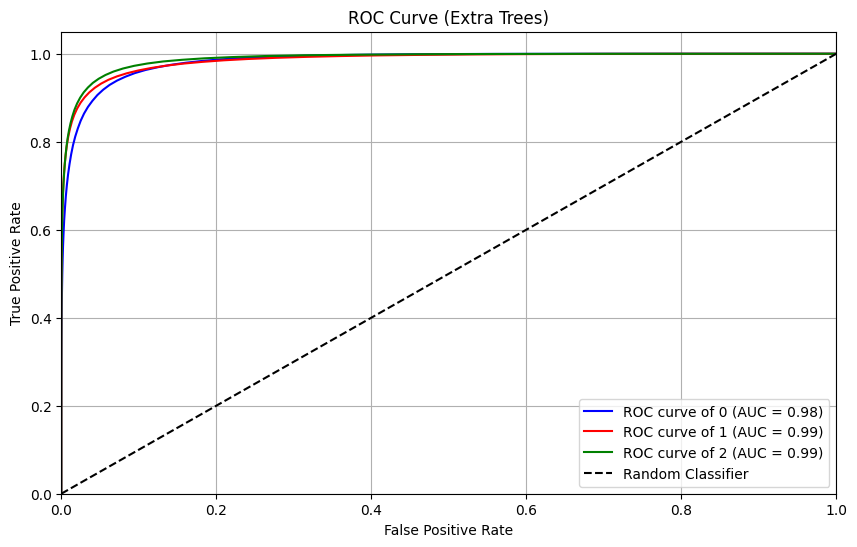


=== AUC Scores ===
0: 0.983
1: 0.986
2: 0.989

=== ROC Curve Analysis (CatBoost) ===


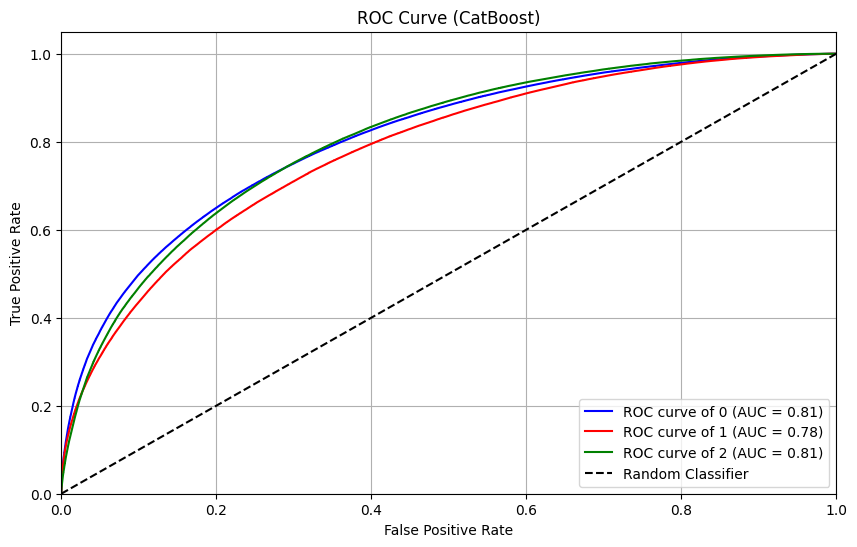


=== AUC Scores ===
0: 0.807
1: 0.782
2: 0.805

=== ROC Curve Analysis (LightGBM) ===


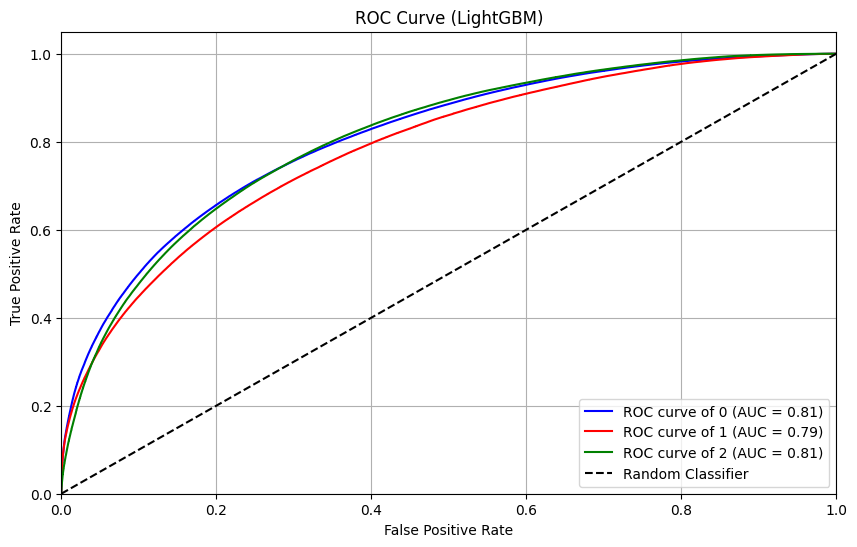


=== AUC Scores ===
0: 0.811
1: 0.786
2: 0.809

=== ROC Curve Analysis (XGBoost) ===


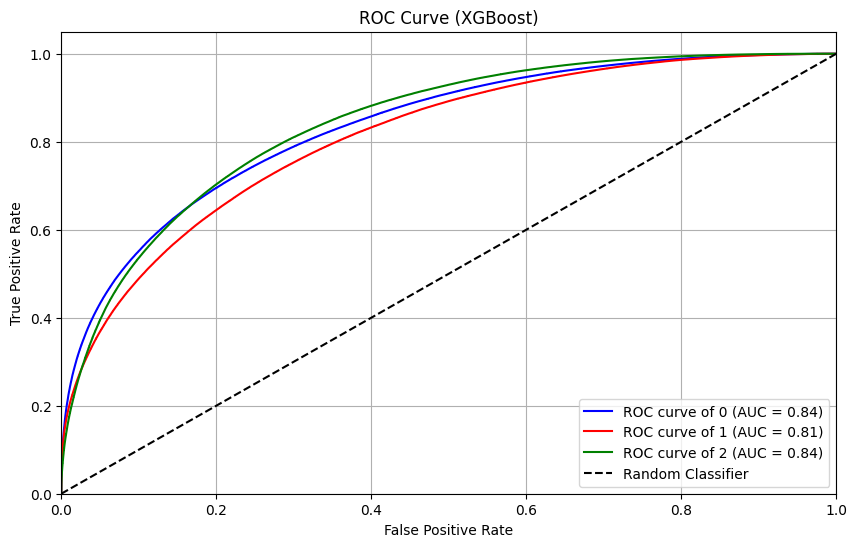


=== AUC Scores ===
0: 0.835
1: 0.811
2: 0.842


In [15]:
for name, model in models.items():
    print(f"\n=== ROC Curve Analysis ({name}) ===")

    # 예측 확률 생성
    y_pred_proba = model.predict_proba(X_test)

    # 클래스별 FPR, TPR, AUC 저장
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    auc_scores = {}

    # 클래스별 ROC 곡선 계산
    for i, class_name in enumerate(np.unique(Y)):
        fpr[i], tpr[i], _ = roc_curve(
            (Y_test == class_name).astype(int),  # 다중 클래스 ROC 변환
            y_pred_proba[:, i]
        )
        roc_auc[i] = auc(fpr[i], tpr[i])
        auc_scores[class_name] = roc_auc[i]

    # ROC 커브 그리기
    plt.figure(figsize=(10, 6))
    colors = cycle(['blue', 'red', 'green'])

    for i, (color, class_name) in enumerate(zip(colors, np.unique(Y))):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            label=f'ROC curve of {class_name} (AUC = {roc_auc[i]:.2f})'
        )

    # 완벽한 예측선을 추가
    plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({name})')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # AUC 점수 출력
    print("\n=== AUC Scores ===")
    for class_name, score in auc_scores.items():
        print(f"{class_name}: {score:.3f}")




=== Precision-Recall Curve Analysis (Extra Trees) ===


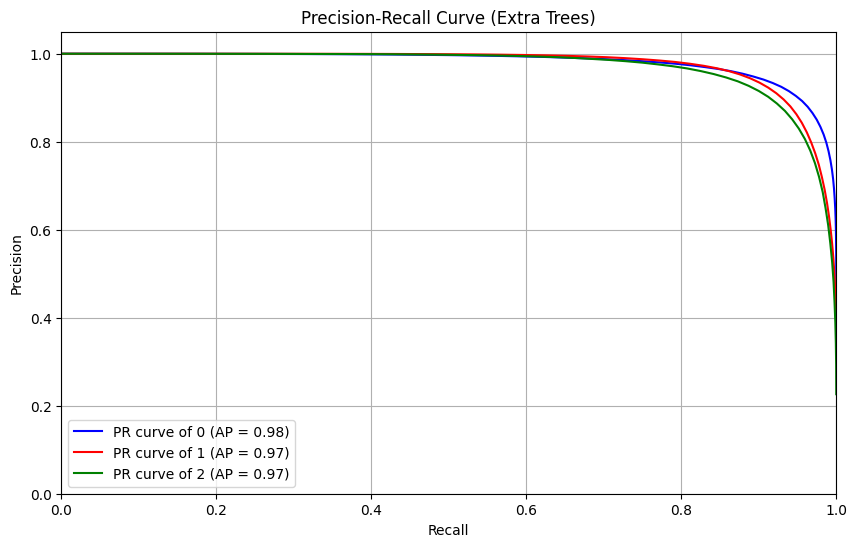


=== Average Precision Scores ===
0: 0.979
1: 0.974
2: 0.968

=== Precision-Recall Curve Analysis (CatBoost) ===


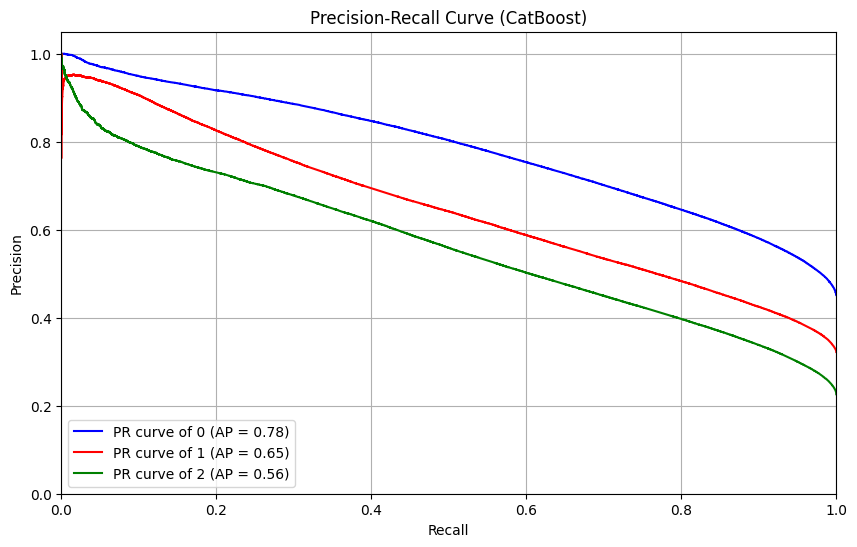


=== Average Precision Scores ===
0: 0.783
1: 0.651
2: 0.565

=== Precision-Recall Curve Analysis (LightGBM) ===


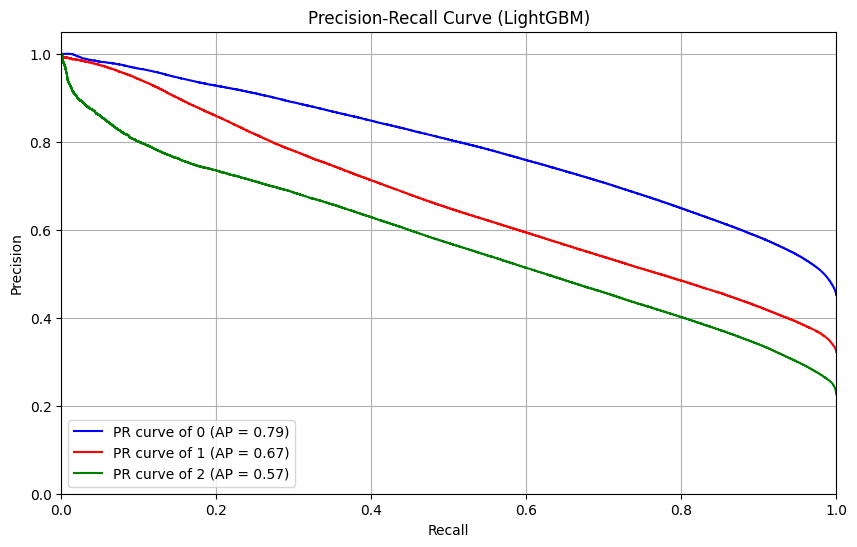


=== Average Precision Scores ===
0: 0.788
1: 0.666
2: 0.572

=== Precision-Recall Curve Analysis (XGBoost) ===


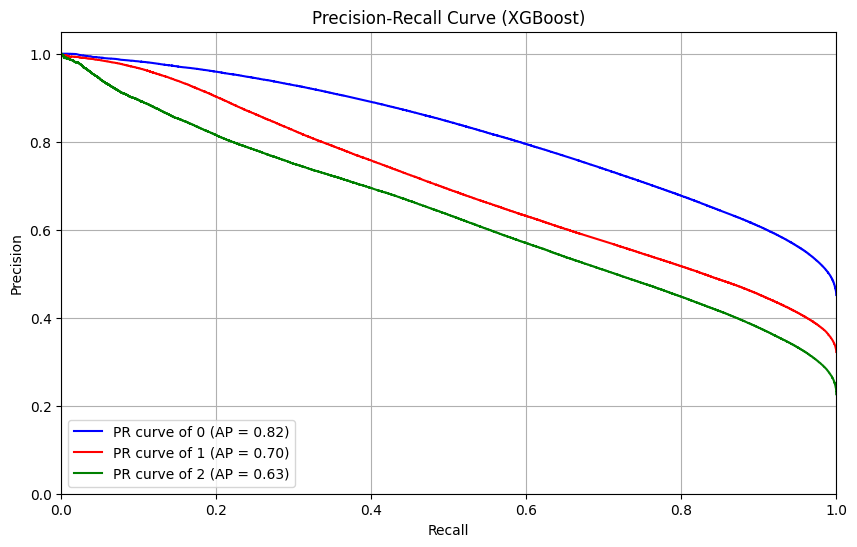


=== Average Precision Scores ===
0: 0.818
1: 0.700
2: 0.633


In [16]:
for name, model in models.items():
    print(f"\n=== Precision-Recall Curve Analysis ({name}) ===")

    # 예측 확률 생성
    y_pred_proba = model.predict_proba(X_test)

    # 클래스별 Precision, Recall, AP 저장
    precision = dict()
    recall = dict()
    avg_precision = dict()
    ap_scores = {}

    # 클래스별 PR 곡선 계산
    for i, class_name in enumerate(np.unique(Y)):
        precision[i], recall[i], _ = precision_recall_curve(
            (Y_test == class_name).astype(int),  # 다중 클래스 PR 변환
            y_pred_proba[:, i]
        )
        avg_precision[i] = average_precision_score(
            (Y_test == class_name).astype(int),
            y_pred_proba[:, i]
        )
        ap_scores[class_name] = avg_precision[i]

    # PR 커브 그리기
    plt.figure(figsize=(10, 6))
    colors = cycle(['blue', 'red', 'green'])

    for i, (color, class_name) in enumerate(zip(colors, np.unique(Y))):
        plt.plot(
            recall[i],
            precision[i],
            color=color,
            label=f'PR curve of {class_name} (AP = {avg_precision[i]:.2f})'
        )

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve ({name})')
    plt.legend(loc="lower left")
    plt.grid(True)
    plt.show()

    # AP 점수 출력
    print("\n=== Average Precision Scores ===")
    for class_name, score in ap_scores.items():
        print(f"{class_name}: {score:.3f}")


=== Calibration Analysis (Extra Trees) ===


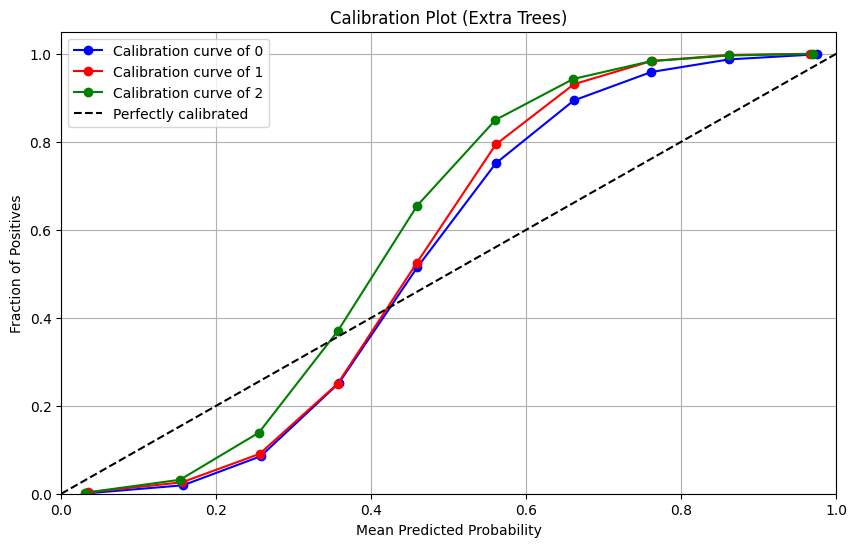


=== Calibration Scores ===
0: 0.128
1: 0.139
2: 0.143

=== Calibration Analysis (CatBoost) ===


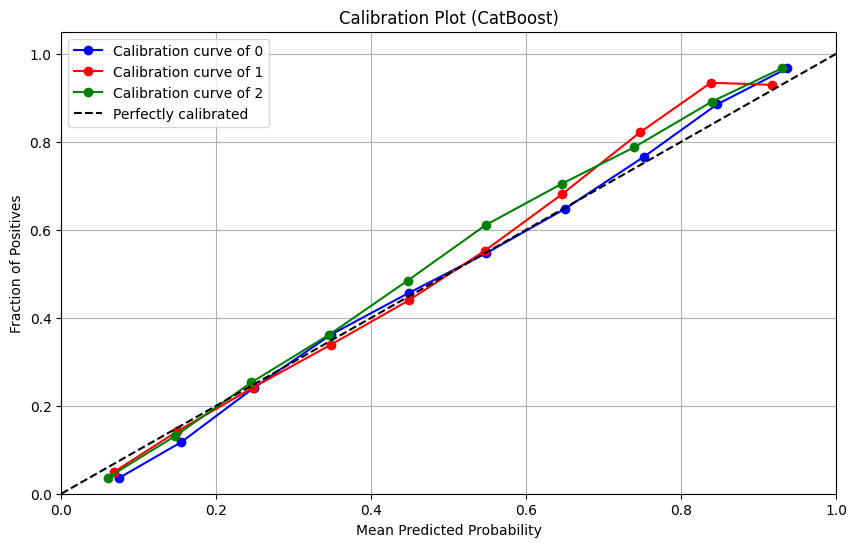


=== Calibration Scores ===
0: 0.019
1: 0.027
2: 0.036

=== Calibration Analysis (LightGBM) ===


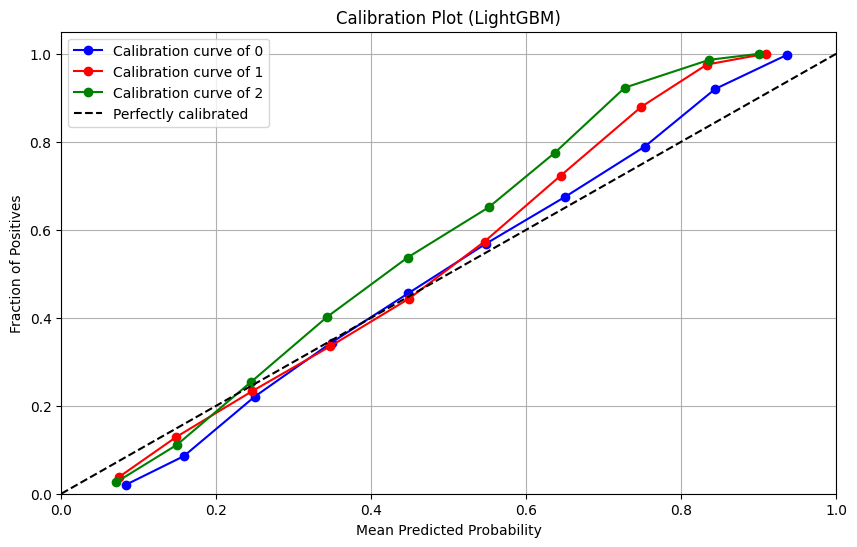


=== Calibration Scores ===
0: 0.040
1: 0.056
2: 0.092

=== Calibration Analysis (XGBoost) ===


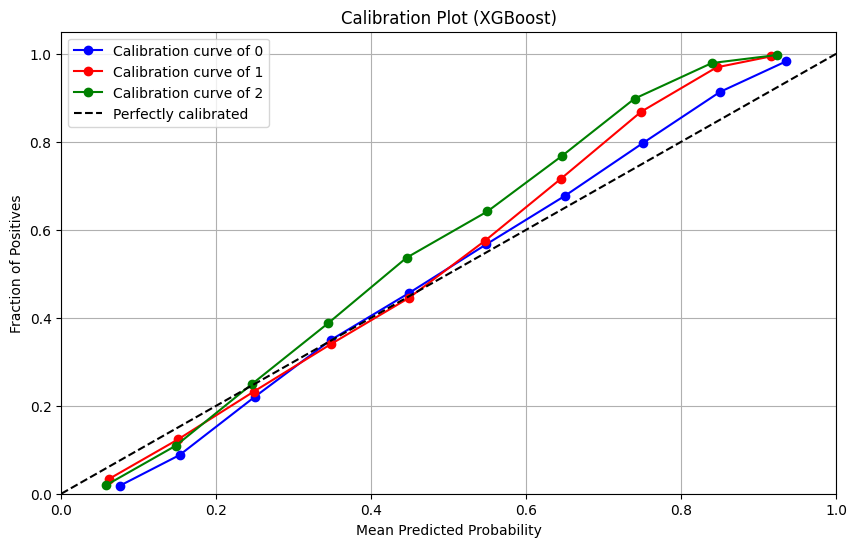


=== Calibration Scores ===
0: 0.036
1: 0.050
2: 0.080


In [17]:
for name, model in models.items():
    print(f"\n=== Calibration Analysis ({name}) ===")

    # 예측 확률 생성
    y_pred_proba = model.predict_proba(X_test)

    # 클래스별 Calibration 정보 저장
    prob_true = dict()
    prob_pred = dict()
    calibration_scores = {}

    # 그래프 색상 설정
    colors = cycle(['blue', 'red', 'green'])

    # 캘리브레이션 곡선 계산
    plt.figure(figsize=(10, 6))
    for i, (color, class_name) in enumerate(zip(colors, np.unique(Y))):
        prob_true[i], prob_pred[i] = calibration_curve(
            (Y_test == class_name).astype(int),  # 다중 클래스 변환
            y_pred_proba[:, i],
            n_bins=10
        )
        # 신뢰도 계산 (절대 오차의 평균)
        calibration_scores[class_name] = np.mean(np.abs(prob_true[i] - prob_pred[i]))

        # Calibration Curve 그리기
        plt.plot(
            prob_pred[i],
            prob_true[i],
            marker='o',
            color=color,
            label=f'Calibration curve of {class_name}'
        )

    # 완벽히 보정된 모델 기준선 추가
    plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Mean Predicted Probability')
    plt.ylabel('Fraction of Positives')
    plt.title(f'Calibration Plot ({name})')
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

    # Calibration Score 출력
    print("\n=== Calibration Scores ===")
    for class_name, score in calibration_scores.items():
        print(f"{class_name}: {score:.3f}")


=== Feature Importance Analysis (Extra Trees) ===


<ipython-input-18-247a4bfd1836>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), palette='viridis')


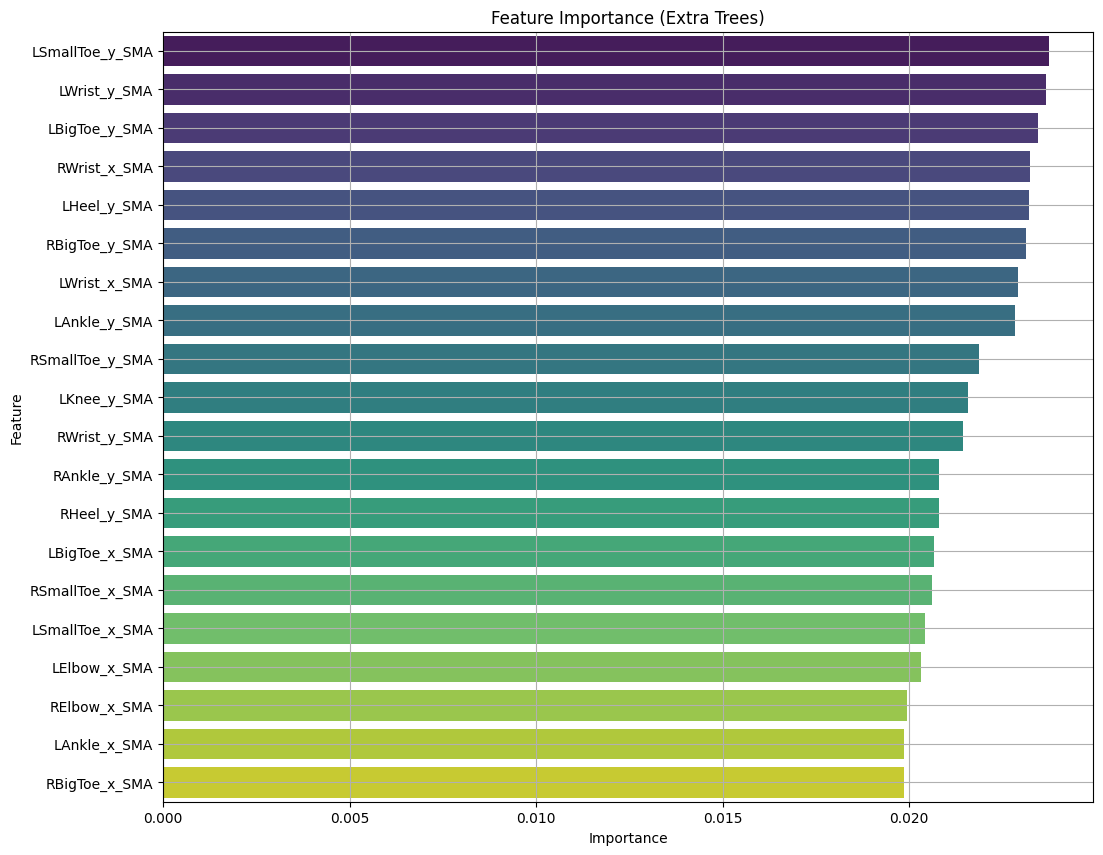


=== Feature Importance (Extra Trees) ===
            Feature  Importance
45  LSmallToe_y_SMA    0.023748
19     LWrist_y_SMA    0.023661
41    LBigToe_y_SMA    0.023455
20     RWrist_x_SMA    0.023255
49      LHeel_y_SMA    0.023227
43    RBigToe_y_SMA    0.023135
18     LWrist_x_SMA    0.022926
31     LAnkle_y_SMA    0.022850
47  RSmallToe_y_SMA    0.021864
27      LKnee_y_SMA    0.021569
21     RWrist_y_SMA    0.021440
33     RAnkle_y_SMA    0.020804
51      RHeel_y_SMA    0.020802
40    LBigToe_x_SMA    0.020658
46  RSmallToe_x_SMA    0.020602
44  LSmallToe_x_SMA    0.020428
14     LElbow_x_SMA    0.020309
16     RElbow_x_SMA    0.019950
30     LAnkle_x_SMA    0.019872
42    RBigToe_x_SMA    0.019851

=== Feature Importance Analysis (CatBoost) ===


<ipython-input-18-247a4bfd1836>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), palette='viridis')


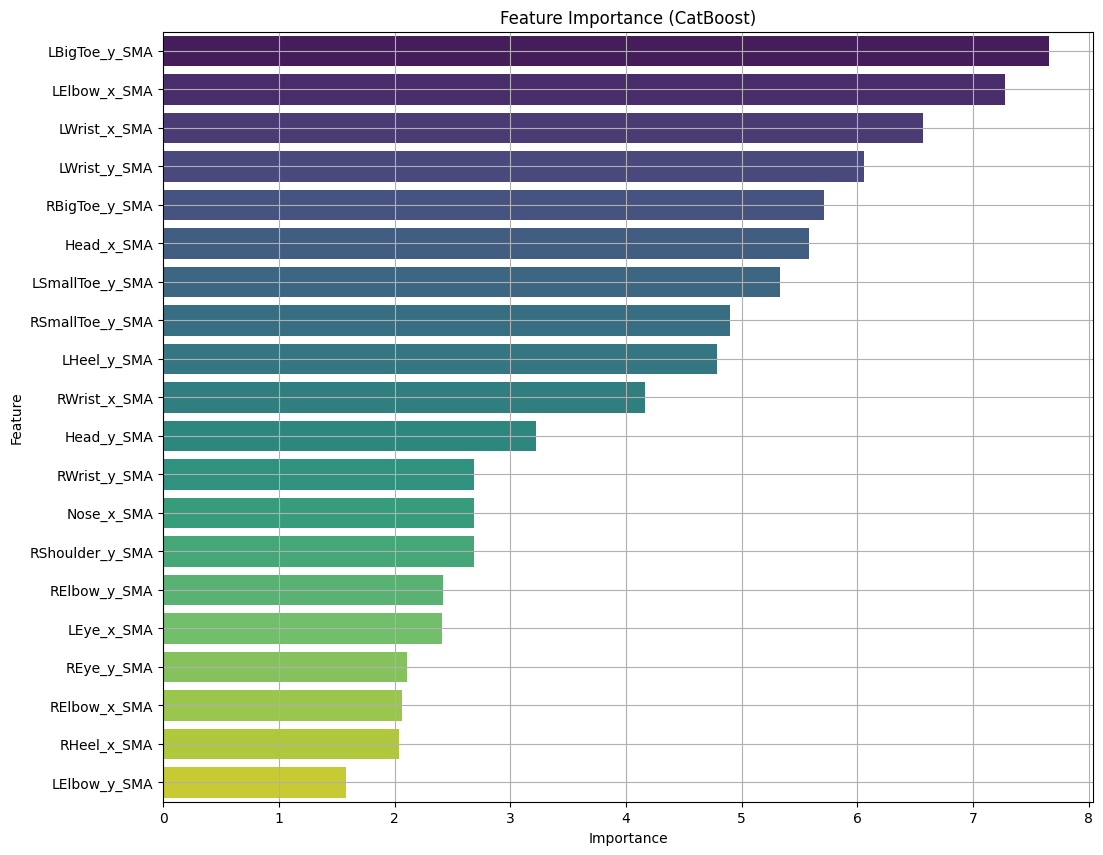


=== Feature Importance (CatBoost) ===
            Feature  Importance
41    LBigToe_y_SMA    7.654085
14     LElbow_x_SMA    7.274598
18     LWrist_x_SMA    6.569339
19     LWrist_y_SMA    6.060333
43    RBigToe_y_SMA    5.707529
34       Head_x_SMA    5.583353
45  LSmallToe_y_SMA    5.332263
47  RSmallToe_y_SMA    4.895202
49      LHeel_y_SMA    4.788423
20     RWrist_x_SMA    4.165557
35       Head_y_SMA    3.222878
21     RWrist_y_SMA    2.686500
0        Nose_x_SMA    2.685811
13  RShoulder_y_SMA    2.682738
17     RElbow_y_SMA    2.421265
2        LEye_x_SMA    2.412304
5        REye_y_SMA    2.110899
16     RElbow_x_SMA    2.066857
50      RHeel_x_SMA    2.037059
15     LElbow_y_SMA    1.581443

=== Feature Importance Analysis (LightGBM) ===


<ipython-input-18-247a4bfd1836>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), palette='viridis')


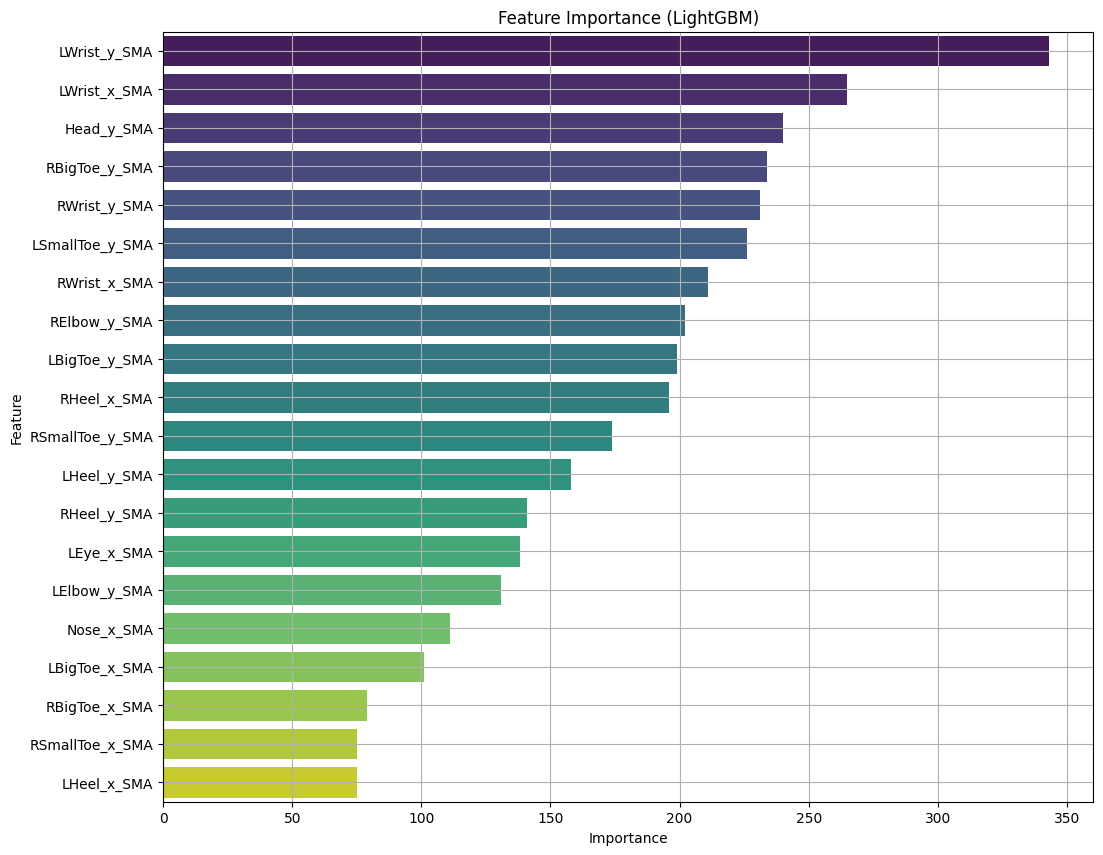


=== Feature Importance (LightGBM) ===
            Feature  Importance
19     LWrist_y_SMA         343
18     LWrist_x_SMA         265
35       Head_y_SMA         240
43    RBigToe_y_SMA         234
21     RWrist_y_SMA         231
45  LSmallToe_y_SMA         226
20     RWrist_x_SMA         211
17     RElbow_y_SMA         202
41    LBigToe_y_SMA         199
50      RHeel_x_SMA         196
47  RSmallToe_y_SMA         174
49      LHeel_y_SMA         158
51      RHeel_y_SMA         141
2        LEye_x_SMA         138
15     LElbow_y_SMA         131
0        Nose_x_SMA         111
40    LBigToe_x_SMA         101
42    RBigToe_x_SMA          79
46  RSmallToe_x_SMA          75
48      LHeel_x_SMA          75

=== Feature Importance Analysis (XGBoost) ===


<ipython-input-18-247a4bfd1836>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), palette='viridis')


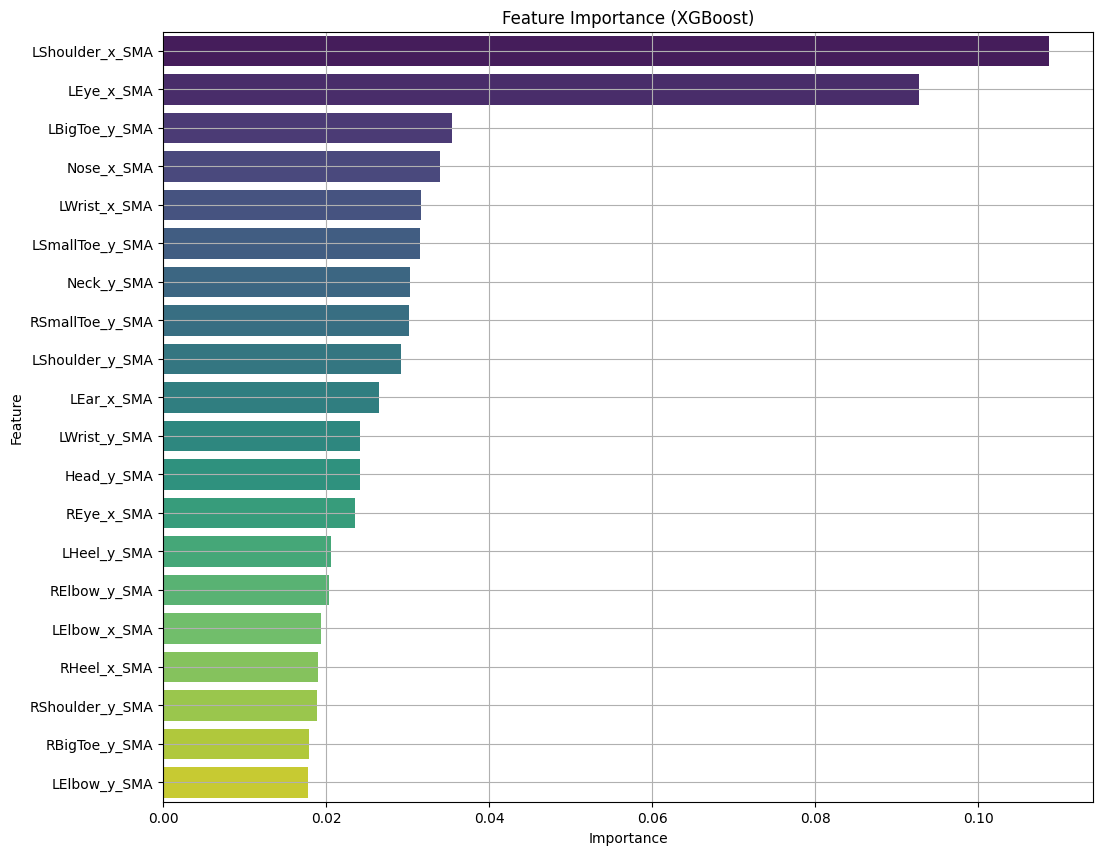


=== Feature Importance (XGBoost) ===
            Feature  Importance
10  LShoulder_x_SMA    0.108685
2        LEye_x_SMA    0.092759
41    LBigToe_y_SMA    0.035477
0        Nose_x_SMA    0.033914
18     LWrist_x_SMA    0.031607
45  LSmallToe_y_SMA    0.031482
37       Neck_y_SMA    0.030233
47  RSmallToe_y_SMA    0.030116
11  LShoulder_y_SMA    0.029205
6        LEar_x_SMA    0.026499
19     LWrist_y_SMA    0.024154
35       Head_y_SMA    0.024131
4        REye_x_SMA    0.023505
49      LHeel_y_SMA    0.020584
17     RElbow_y_SMA    0.020331
14     LElbow_x_SMA    0.019345
50      RHeel_x_SMA    0.019015
13  RShoulder_y_SMA    0.018829
43    RBigToe_y_SMA    0.017907
15     LElbow_y_SMA    0.017820


In [18]:
for name, model in models.items():
    print(f"\n=== Feature Importance Analysis ({name}) ===")

    # Feature Importance 계산
    if hasattr(model, "feature_importances_"):
        importance = model.feature_importances_
        feature_names = X.columns

        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importance
        }).sort_values(by='Importance', ascending=False)

        # Feature Importance 시각화
        plt.figure(figsize=(12, 10))
        sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), palette='viridis')
        plt.title(f'Feature Importance ({name})')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.grid(True)
        plt.show()

        # Feature Importance 상위 20개 출력
        print(f"\n=== Feature Importance ({name}) ===")
        print(importance_df.head(20))

    else:
        print(f"⚠ {name} 모델은 feature_importances_ 속성을 지원하지 않습니다.")